### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import exists

import sys
sys.path.insert(1, '/global/homes/j/joeschm/IFS_scripts')
from genetools import Parameters

### Function for Retrieving Non-zero Omega Files

In [2]:
def omega_EV_df(filepath):
    omega_col = ['scanfile', 'kymin', 'n0_global','gamma(cs/a)', 'omega(kHz)']
    omega_df = pd.DataFrame(columns=omega_col)

    scanfile_list = os.listdir(filepath)
    for scanfile in scanfile_list:                #run through list of scanfiles

        scanfile_path = filepath + "/" + scanfile
        os.chdir(scanfile_path)                   #enter into scanfile directory
        
        if exists(scanfile_path + "/" + "EV_log.csv"):
            

            omega_CSV = pd.read_csv("EV_log.csv")
            omega_CSV['n0_global'] = 0

            ky_n0_col = ['kymin', 'n0_global']
            ky_n0_df = pd.DataFrame(columns=ky_n0_col)

            for filename in os.listdir(os.getcwd()):
                if filename.startswith("parameters_"):
                    suffix = filename[-4:]     #get 00xx suffix for omega file
                    par = Parameters()
                    par.Read_Pars('parameters_'+suffix)  #read parameter file

                    pars = par.pardict                   #create a dictionary of values
                    n0_global = pars['n0_global']   #
                    kymin = pars['kymin']         #ion mass

                    ky_n0_scan = pd.DataFrame([[kymin, n0_global]], columns = ky_n0_col)
                    ky_n0_df = ky_n0_df.append(ky_n0_scan)

            #omega_CSV.drop_duplicates(inplace=True)

            omega_CSV = ky_n0_df.set_index('kymin').combine_first(omega_CSV.drop_duplicates().set_index('kymin')).reset_index() #fill in n0_global values according to kymin values
            omega_CSV['n0_global'] = omega_CSV.n0_global.astype(float) #convert from an object to a float


            omega_temp = pd.DataFrame(columns=omega_col)
            omega_temp = pd.DataFrame({'scanfile': scanfile , 'kymin': omega_CSV['kymin'], 'n0_global': 0, 'gamma(cs/a)': 0, 'omega(kHz)': 0})
            omega_temp['kymin'] = omega_CSV['kymin']
            omega_temp['n0_global'] = omega_CSV['n0_global']
            omega_temp['gamma(cs/a)'] = omega_CSV['gamma(cs/a)']
            omega_temp['omega(kHz)'] = omega_CSV['omega(kHz)']

            omega_df = omega_df.append(omega_temp)
            #print(omega_temp)

    return omega_df

### Check Data Output and Plot

In [3]:
efit2_path = "/global/cscratch1/sd/joeschm/AUG/efit2_EVS"
miller2_path = "/global/cscratch1/sd/joeschm/AUG/miller2_EVS"

In [4]:
efit2_omega = omega_EV_df(efit2_path).reset_index()
print(efit2_omega)

     index       scanfile  kymin  n0_global  gamma(cs/a)    omega(kHz)
0        0  scanfiles0001    9.0     1031.0     5.384009   -726.418247
1        1  scanfiles0001    9.0     1031.0     5.382663   -726.364952
2        2  scanfiles0001    9.0     1031.0     5.164436   -899.114546
3        3  scanfiles0001    9.0     1031.0     5.164435   -899.269420
4        4  scanfiles0001    9.0     1031.0     5.064882  -1018.212235
..     ...            ...    ...        ...          ...           ...
154     46  scanfiles0000  160.0    18335.0    73.970121 -19811.348930
155     47  scanfiles0000  160.0    18335.0    64.825705 -16455.452735
156     48  scanfiles0000  160.0    18335.0    61.397127 -11809.617018
157     49  scanfiles0000  160.0    18335.0    61.317999 -11811.202838
158     50  scanfiles0000  160.0    18335.0    60.552368 -16148.705034

[159 rows x 6 columns]


In [5]:
miller2_omega = omega_EV_df(miller2_path).reset_index()
print(miller2_omega)

     index       scanfile   kymin  n0_global  gamma(cs/a)    omega(kHz)
0        0  scanfiles0002    4.32      429.0          NaN           NaN
1        1  scanfiles0002    8.65      858.0    44.703968  -4704.206472
2        2  scanfiles0002    8.65      858.0    44.647185  -4713.907507
3        3  scanfiles0002    8.65      858.0    44.624031  -4331.452029
4        4  scanfiles0002    8.65      858.0    44.592338  -4322.823963
..     ...            ...     ...        ...          ...           ...
403     14  scanfiles0000   69.24     6868.0     6.951825 -42916.243713
404     15  scanfiles0000   69.24     6868.0     6.943273 -39388.272020
405     16  scanfiles0000   69.24     6868.0     6.768822 -43601.866110
406     17  scanfiles0000  103.87    10303.0          NaN           NaN
407     18  scanfiles0000  138.50    13738.0          NaN           NaN

[408 rows x 6 columns]


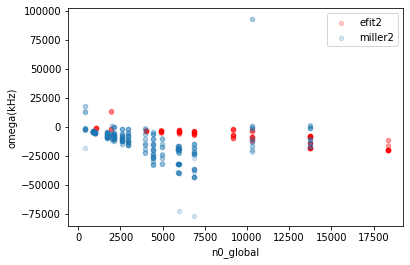

In [6]:
ax = efit2_omega.plot(x ='n0_global', y='omega(kHz)', kind = 'scatter', color = 'red', label = 'efit2', alpha = 0.2)
miller2_omega.plot(x ='n0_global', y='omega(kHz)', kind = 'scatter', ax = ax, label = 'miller2', alpha = 0.2)

#plt.ylim(-30000,-3000)
plt.legend()
plt.show()